# Importing Dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# K-Means Clustering Necessary Imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Random Forest Necessary Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

#make the plots show up inline
%matplotlib inline

In [2]:
# Representing data
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape
#iris

(150,)

In [8]:
y_iris

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [10]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2)

In [11]:
type(X_train_iris)

pandas.core.frame.DataFrame

In [12]:
rfclf_iris = RandomForestClassifier()
rfclf_iris.fit(X_train_iris, y_train_iris)

y_prediction_iris = rfclf_iris.predict(X_test_iris)

In [13]:
y_prediction_iris

array(['versicolor', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'setosa', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'setosa', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

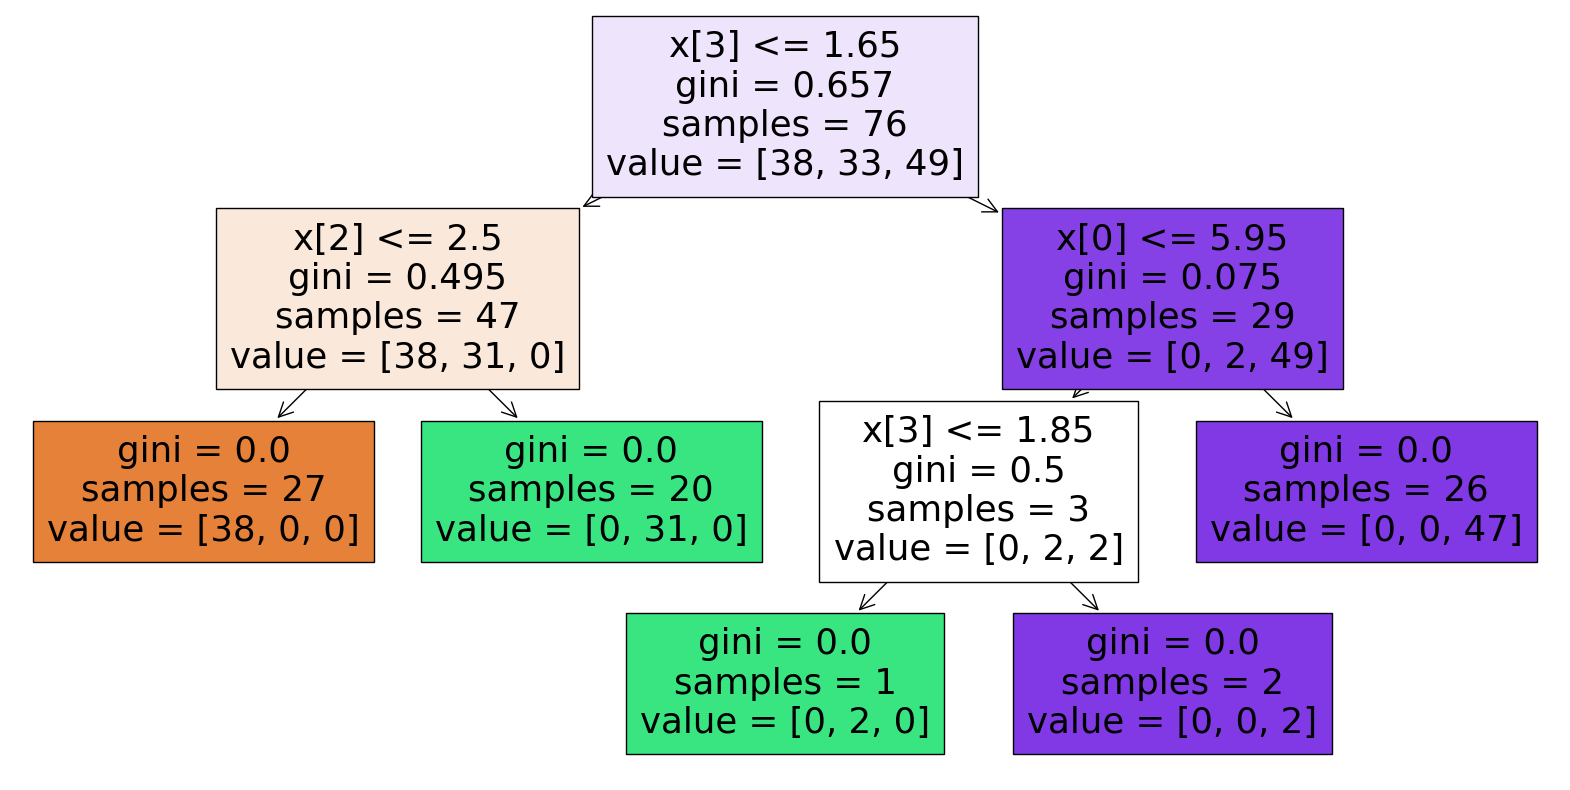

In [77]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(rfclf_iris.estimators_[1], filled=True)
plt.show()

In [27]:
tree = rfclf_iris.estimators_[1]

In [30]:
tree_structure = tree.tree_

In [32]:
left_child = tree_structure.children_left[0]

In [34]:
node_indices = tree.apply(X_train_iris)

C:\Users\adamr\anaconda3\lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



In [39]:
samples_in_left_child = np.where(node_indices == left_child)[0]

In [40]:
samples_in_left_child

array([  0,   2,   3,   9,  10,  14,  17,  19,  26,  27,  31,  36,  37,
        40,  41,  47,  50,  51,  56,  62,  64,  65,  68,  71,  80,  85,
        87,  91,  96, 102, 103, 105, 106, 110, 113, 116], dtype=int64)

In [28]:
import dash
from dash import dcc, html, Input, Output
import plotly.graph_objects as go
import pandas as pd
from dash.dash_table import DataTable

# Define a simple binary search tree node class
class Node:
    def __init__(self, value, pos, color):
        self.value = value
        self.left = None
        self.right = None
        self.pos = pos
        self.color = color

# Create the binary search tree
def create_bst():
    root = Node(10, (0, 0), 'red')  # Root
    root.left = Node(5, (-1.5, -1), 'green')  # Left child
    root.right = Node(15, (1.5, -1), 'blue')  # Right child
    return root

# Function to extract nodes for visualization
def extract_nodes(node, nodes):
    if node is not None:
        nodes.append((node.value, node.pos, node.color))
        extract_nodes(node.left, nodes)
        extract_nodes(node.right, nodes)

# Create the tree and extract nodes
bst_root = create_bst()
nodes = []
extract_nodes(bst_root, nodes)

# Prepare the data for Plotly
node_labels = [f"{value} ({color})" for value, _, color in nodes]
node_positions = [pos for _, pos, _ in nodes]
node_colors = [color for _, _, color in nodes]

# Create a Plotly figure
fig = go.Figure()

# Add nodes and connect them with lines
for (value, (x, y), color) in nodes:
    fig.add_trace(go.Scatter(
        x=[x], y=[y],
        mode='markers+text',
        marker=dict(size=50, color=color),  # Increase size for better visibility
        text=[f"{value} ({color})"],  # Show both value and color
        textposition='middle center',  # Center the text inside the node
        textfont=dict(size=14),  # Increase text size for better visibility
        name=str(value),  # Set name for click event
        hoverinfo='text'
    ))

    # Connect left child
    if value == 10:  # If the node is the root
        left_child = nodes[1]  # Green (5)
        fig.add_trace(go.Scatter(
            x=[x, left_child[1][0]], y=[y, left_child[1][1]],
            mode='lines',
            line=dict(color='black')
        ))

# Connect the right child of the root
right_child = nodes[2]  # Blue (15)
fig.add_trace(go.Scatter(
    x=[nodes[0][1][0], right_child[1][0]], y=[nodes[0][1][1], right_child[1][1]],
    mode='lines',
    line=dict(color='black')
))

# Layout adjustments
fig.update_layout(
    title='Binary Search Tree',
    showlegend=False,
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    height=600,
    width=800,  # Increase width for better visibility
    paper_bgcolor='white'
)

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("Binary Search Tree Visualization"),
    dcc.Graph(
        id='bst-graph',
        figure=fig,
        config={'displayModeBar': True}
    ),
    DataTable(
        id='node-info',
        columns=[{"name": "Node Value", "id": "value"},
                 {"name": "Color", "id": "color"},
                 {"name": "Position", "id": "position"}],
        data=[],
        style_table={'overflowX': 'auto'},
        style_cell={
            'textAlign': 'left',
            'padding': '5px',
        },
    )
])

# Callback to update the DataTable on node click
@app.callback(
    Output('node-info', 'data'),
    Input('bst-graph', 'clickData')
)
def display_node_info(clickData):
    if clickData is None:
        return []

    # Get the node value clicked
    node_value = clickData['points'][0]['text']
    # Find the corresponding node in the list
    for value, pos, color in nodes:
        if str(value) in node_value:
            return [{"value": value, "color": color, "position": pos}]

    return []

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8053)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[27], line 145, in display_node_info(
    clickData={'points': [{'bbox': {'x0': 383, 'x1': 433, 'y0': 207.25, 'y1': 257.25}, 'curveNumber': 0, 'pointIndex': 0, 'pointNumber': 0, 'text': '10 (red)', 'x': 0, 'y': 0}]}
)
    142 node_value = clickData['points'][0]['text']
    144 # Find the corresponding node and return its DataFrame
--> 145 for value, pos, color, data in nodes:
        nodes = [(10, (0, 0), 'red'), (5, (-1.5, -1), 'green'), (15, (1.5, -1), 'blue')]
        value = 15
        color = 'blue'
    146     if str(value) in node_value:
    147         # Convert df.describe() to a DataTable with row labels
    148         describe_df = data.describe().reset_index()  # Add index (row labels) as a column

ValueError: not enough values to unpack (expected 4, got 3)

-----------------------------------------------------------

In [29]:
import dash
from dash import dcc, html, Input, Output
import plotly.graph_objects as go
import pandas as pd
from dash.dash_table import DataTable
import io  # For capturing df.info() output

# Define a binary search tree node class with a DataFrame
class Node:
    def __init__(self, value, pos, color, data):
        self.value = value
        self.left = None
        self.right = None
        self.pos = pos
        self.color = color
        self.data = data  # Store a DataFrame in each node

# Create the binary search tree with DataFrames (columns: x, y)
def create_bst():
    # Root node
    root = Node(10, (0, 0), 'red', pd.DataFrame({'x': [1, 2], 'y': [1, 2]}))  # Root with values (1,1) and (2,2)
    # Left child
    root.left = Node(5, (-1, -1), 'green', pd.DataFrame({'x': [1], 'y': [1]}))  # Left child with value (1,1)
    # Right child
    root.right = Node(15, (1, -1), 'blue', pd.DataFrame({'x': [2], 'y': [2]}))  # Right child with value (2,2)
    return root

# Function to extract nodes for visualization
def extract_nodes(node, nodes):
    if node is not None:
        nodes.append((node.value, node.pos, node.color, node.data))  # Add the DataFrame to the node information
        extract_nodes(node.left, nodes)
        extract_nodes(node.right, nodes)

# Create the tree and extract nodes
bst_root = create_bst()
nodes = []
extract_nodes(bst_root, nodes)

# Prepare the data for Plotly
node_labels = [f"{value} ({color})" for value, _, color, _ in nodes]
node_positions = [pos for _, pos, _, _ in nodes]
node_colors = [color for _, _, color, _ in nodes]

# Create a Plotly figure
fig = go.Figure()

# Add nodes and connect them with lines
for (value, (x, y), color, _) in nodes:
    fig.add_trace(go.Scatter(
        x=[x], y=[y],
        mode='markers+text',
        marker=dict(size=50, color=color),  # Increase size for better visibility
        text=[f"{value} ({color})"],  # Show both value and color
        textposition='middle center',  # Center the text inside the node
        textfont=dict(size=14),  # Increase text size for better visibility
        name=str(value),  # Set name for click event
        hoverinfo='text'
    ))

    # Connect left child
    if value == 10:  # If the node is the root
        left_child = nodes[1]  # Green (5)
        fig.add_trace(go.Scatter(
            x=[x, left_child[1][0]], y=[y, left_child[1][1]],
            mode='lines',
            line=dict(color='black')
        ))
    elif value == 5:  # If the node is green (5)
        fig.add_trace(go.Scatter(
            x=[x, left_child[1][0]], y=[y, left_child[1][1]],
            mode='lines',
            line=dict(color='black')
        ))
        fig.add_trace(go.Scatter(
            x=[x, right_child[1][0]], y=[y, right_child[1][1]],
            mode='lines',
            line=dict(color='black')
        ))

# Connect the right child of the root
right_child = nodes[2]  # Blue (15)
fig.add_trace(go.Scatter(
    x=[nodes[0][1][0], right_child[1][0]], y=[nodes[0][1][1], right_child[1][1]],
    mode='lines',
    line=dict(color='black')
))

# Layout adjustments
fig.update_layout(
    title='Binary Search Tree',
    showlegend=False,
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    height=600,
    width=800,  # Increase width for better visibility
    paper_bgcolor='white'
)

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("Binary Search Tree Visualization"),
    dcc.Graph(
        id='bst-graph',
        figure=fig,
        config={'displayModeBar': True}
    ),
    html.Div([
        html.Hr(),
        html.H3("Node Data"),
        html.Div(id='node-dataframe'),
    ], style={'margin': '20px'}),

    html.Div([
        html.Hr(),
        html.H3("Describe Output"),
        html.Div(id='node-describe'),
    ], style={'margin': '20px'}),

    html.Div([
        html.Hr(),
        html.H3("Info Output"),
        html.Pre(id='node-info-output')  # Preformatted text for df.info()
    ], style={'margin': '20px'})
])

# Callback to update the DataTable on node click
@app.callback(
    [Output('node-dataframe', 'children'),
     Output('node-describe', 'children'),
     Output('node-info-output', 'children')],
    Input('bst-graph', 'clickData')
)
def display_node_info(clickData):
    if clickData is None:
        return '', '', ''

    # Get the node value clicked
    node_value = clickData['points'][0]['text']
    
    # Find the corresponding node and return its DataFrame
    for value, pos, color, data in nodes:
        if str(value) in node_value:
            # Convert df.describe() to a DataTable with row labels
            describe_df = data.describe().reset_index()  # Add index (row labels) as a column
            describe_df.rename(columns={'index': 'Statistic'}, inplace=True)  # Rename index column
            
            
            # Convert df.describe() to a DataTable
            describe_table = DataTable(
                columns=[{"name": i, "id": i} for i in describe_df.columns],  # Include Statistic column
                data=describe_df.to_dict('records'),
                style_table={'overflowX': 'auto'},
                style_cell={'textAlign': 'left', 'padding': '5px'}
            )
            
            # Capture the df.info() output
            buffer = io.StringIO()
            data.info(buf=buffer)
            info_output = buffer.getvalue()
            
            # Convert the actual DataFrame to a DataTable
            dataframe_table = DataTable(
                columns=[{"name": i, "id": i} for i in data.columns],
                data=data.to_dict('records'),
                style_table={'overflowX': 'auto'},
                style_cell={'textAlign': 'left', 'padding': '5px'}
            )
            
            return dataframe_table, describe_table, info_output

    return '', '', ''

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)
